<a href="https://colab.research.google.com/github/samuelj1323/ML_Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification Probleem
* Classification involves predicting whether something is one thing or another  
###Types:
1. Binary - One or another
2. Multi-class classification - target can be one of many options
3. Multi-label classiciation - target can be assigned more htan on eoption.

## 1. make some classification data and get it ready


In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[: ,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


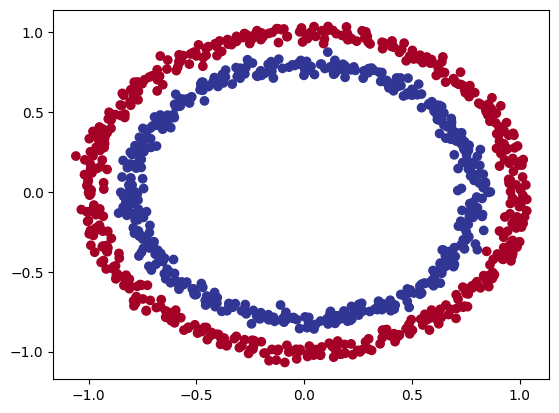

In [ ]:
#Visualize, visualize,
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

#Note: The data we're working with is often reffered to as a toy dataset, a dataset that is small enough to expeiment with to practice on and large enough to practice the fundamentals

### 1.1 check input and otutput shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"values of one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes of one sapmle of X: {X_sample.shape} and same for y: {y_sample.shape}")

values of one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes of one sapmle of X: (2,) and same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
#Turn data into tensors
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train),len(X_test), len(y_train)

(800, 200, 800)

In [ ]:
import torch
from torch import nn
#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# given X (features) we want our model to predict y (labels)

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # #This is where you define the layers
    # self.layer_1 = nn.Linear(in_features=2, out_features=8)
    # self.layer_2 = nn.Linear(in_features=8, out_features=1)
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=8),
        nn.Linear(in_features=8, out_features=1)
    )

  def forward(self, x):
    #This is where you use the layers
    # return self.layer_2(self.layer_1(x))
    return self.two_linear_layers(x)

model_0 = CircleModelV0().to(device)

In [ ]:
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [ ]:
# Let's replicate the model above using nn.sequential()

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.Linear(in_features=128, out_features=256),
    nn.Linear(in_features=256, out_features=1)
    ).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
# Make some predictions
with torch.inference_mode():
  model_0.state_dict()
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
  print(f"\n First 10 predictions: \n {untrained_preds[:10]}")
  print(f"\n First 10 labels: \n {y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

 First 10 predictions: 
 tensor([[ 0.0213],
        [ 0.1054],
        [-0.1780],
        [ 0.0777],
        [-0.1445],
        [-0.0934],
        [ 0.1168],
        [ 0.0704],
        [-0.1791],
        [ 0.1114]])

 First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Set up loss function and optimizer
Which loss function or optimizer should you use?

Again ... this is problem specific

For example for regression you might want MAE or MSE
For classification you might want binary cross entroy or categorical cross entropy (Cross entropy)

As a reminder, the loss function measures how *wrong* your predictions are. your models predictions are.
And for optimizers, two of the most common and useful are SGD and Adam, however Pytorch has many built-in options.

* For some common choices of loss functions and optimizers,
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this art....
* For a definition of what a Logit is in deep learning -
* for different optimizers see `torch.optim`

In [ ]:
# setup the loss funciton
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone throught the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built in.
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
#Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuract_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


### 3. Train Model
To train our mode, we'll need to build a training loop. with the following steps.
1. Forward Pass
2. Calculate the loss
3. optimizer zero grad
4. Loss Backward (backpropagation)
5. Optimizer step (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
our model outputs are going to be raw **logits**
 We can convert these logits into prediction probabiliites by passing them to some kind of activation function (e.g sigmoid for binary crossentropy and softmax for multiclass classification)

 Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`


In [ ]:
#View the first 5 outputs of the forward pass on the test data
model_0.eval
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0213],
        [ 0.1054],
        [-0.1780],
        [ 0.0777],
        [-0.1445]])

logits are outputs that havne't been passed to activation functions

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# USe the sigmoid activation function on our model logits to tuen them into probabilties
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5053],
        [0.5263],
        [0.4556],
        [0.5194],
        [0.4639]])

For our prediction probability values we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension


y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 0.])

In [ ]:
 y_test[:5]

tensor([1., 0., 1., 0., 1.])

1. Do the forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Backpropagation
5. Optimzer step

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10,  out_features=1)

  def forward(self, x):
    #This way leverages speeds ups where possible behind the scenes.
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6609,  0.5342],
                      [-0.6847,  0.2394],
                      [ 0.2559, -0.3826],
                      [-0.0706,  0.0898],
                      [ 0.5336, -0.3856],
                      [-0.1113,  0.0945],
                      [ 0.5794, -0.0376],
                      [-0.2073,  0.1396],
                      [-0.6078,  0.7022],
                      [ 0.1856,  0.7068]])),
             ('layer_1.bias',
              tensor([-0.1107, -0.6650,  0.7015,  0.5805, -0.1389,  0.0761,  0.1024,  0.0713,
                      -0.6753, -0.4710])),
             ('layer_2.weight',
              tensor([[-0.1716, -0.1937, -0.2108,  0.2626,  0.2774,  0.1980, -0.0091, -0.2991,
                       -0.1692,  0.0519],
                      [-0.2250,  0.1878, -0.1920,  0.1497,  0.1444, -0.1940,  0.1357,  0.0728,
                        0.0575, -0.1523],
                      [ 0.1215,  0.2093,  0.0305, -0.2091, -0.2515,  0.1

In [ ]:
# Create a loss funciton
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

torch.manual_seed(42)

#Train for longer
epochs = 1000

#Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  #Do the forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits => preciction probs => prediciotn labels

  #calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuract_fn(y_true=y_train, y_pred=y_pred)

  #Optimizer zero grad
  optimizer.zero_grad()

  #Loss backward
  loss.backward()

  #5. Optimizer
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    #1. foraward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(nn.ELU(test_logits))
    #Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuract_fn(y_true=y_test, y_pred=test_pred)
    #Print out what's happending
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")





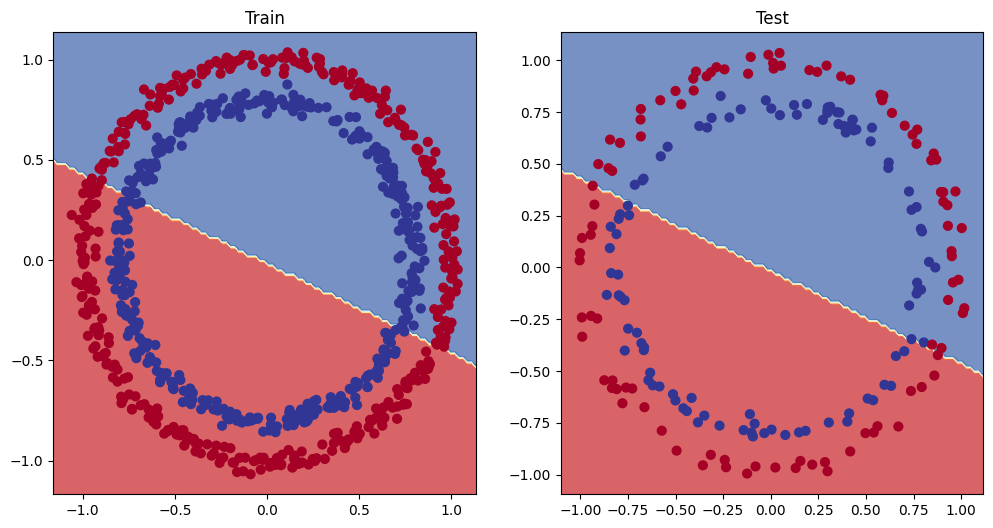

In [ ]:
# plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1,2 ,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

##Preparing data to see if our mdoel can fit a straight line

One way to troubleshoot a larget problem is to test out a smaller problem.


In [ ]:
#Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8* len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

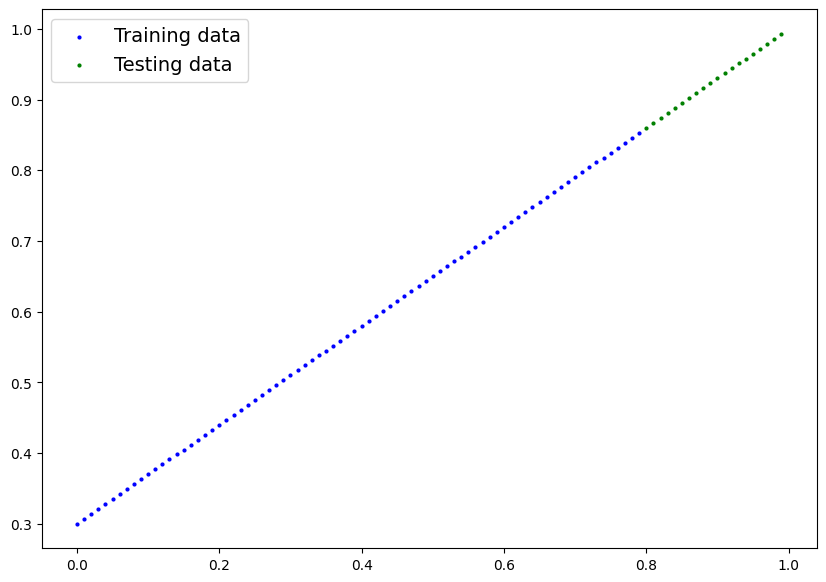

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

###5.2 adjust model_1 to fit a straight line

Same architectrue

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

#Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    #PRint
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss: .5f}  | test loss: {test_loss:.5f}")

Epoch: 0 | Loss:  0.06655  | test loss: 0.08698
Epoch: 100 | Loss:  0.07363  | test loss: 0.09540
Epoch: 200 | Loss:  0.05212  | test loss: 0.09388
Epoch: 300 | Loss:  0.05567  | test loss: 0.11859
Epoch: 400 | Loss:  0.05779  | test loss: 0.12161
Epoch: 500 | Loss:  0.05151  | test loss: 0.08952
Epoch: 600 | Loss:  0.06615  | test loss: 0.11289
Epoch: 700 | Loss:  0.04357  | test loss: 0.10179
Epoch: 800 | Loss:  0.04592  | test loss: 0.12710
Epoch: 900 | Loss:  0.06907  | test loss: 0.09246


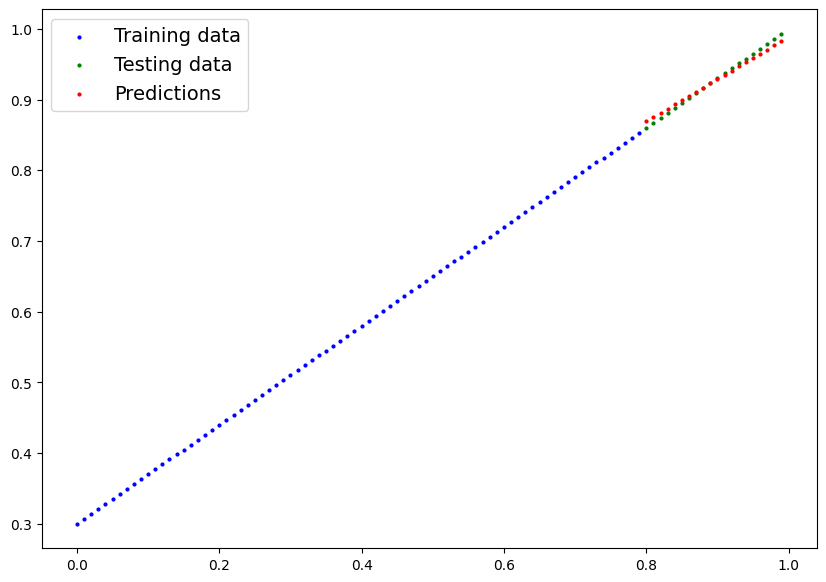

In [ ]:
model_2.eval()
with torch.inference_mode():
  plt_preds = model_2(X_test_regression)

#Plot data and predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=plt_preds)

### 6. missing piece: Non-linearity
What patterns could you draw if you were given an infinfite amount of straight and non-straight lines?
Or in ML terms, an infinite (but really finite) linear and non-linear functions?

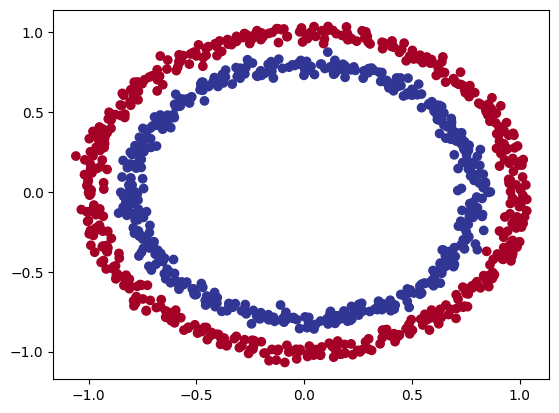

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non=linearity
* Linear = straight_lines,
* Non-linear = non-straight lines


In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #where should we put our non-linear activation funciton?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 10000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuract_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuract_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.56746, Accuracy: 88.00% | Test Loss: 0.57316, Test Accuracy: 86.50%
Epoch: 100 | Loss: 0.48052, Accuracy: 93.50% | Test Loss: 0.49852, Test Accuracy: 90.50%
Epoch: 200 | Loss: 0.36939, Accuracy: 97.88% | Test Loss: 0.40494, Test Accuracy: 92.50%
Epoch: 300 | Loss: 0.25355, Accuracy: 99.00% | Test Loss: 0.30227, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.17116, Accuracy: 99.50% | Test Loss: 0.22043, Test Accuracy: 97.50%
Epoch: 500 | Loss: 0.12149, Accuracy: 99.75% | Test Loss: 0.16466, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.09098, Accuracy: 99.88% | Test Loss: 0.12711, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07084, Accuracy: 99.88% | Test Loss: 0.10302, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05762, Accuracy: 99.88% | Test Loss: 0.08658, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04845, Accuracy: 99.88% | Test Loss: 0.07464, Test Accuracy: 99.50%
Epoch: 1000 | Loss: 0.04170, Accuracy: 99.88% | Test Loss: 0.06576, Test Accuracy: 100.00%
Epoch: 1100 | Loss: 0

## 4. Making predictions and evaluate the model

From the metrics it looksl ike our model isn't learning anything ...
So to inpsect it let's make some prediction and make them visual.

In other words, "Visualize, visualize, visualize"

To do so, we're goint o import a function called `plot_decision_boundary()`


In [ ]:
import requests
from pathlib import Path

#Download helper functions from Learn Pytorch repo (if it's not already downloaded)

if Path("helper_funcitons.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper funcitons.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

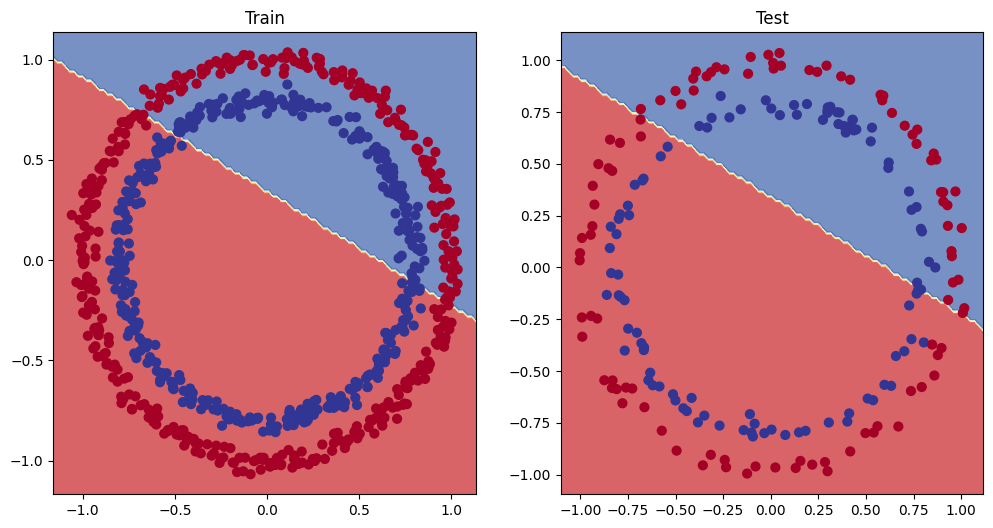

In [ ]:
# Plot decision bounary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2 ,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function


These options are all from a model's persepective because they deal directly with the model, rather than the data.

In [ ]:
# Create some data (same as noteboook 01)
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01
#Create data
X_regression = torch.arange(start,end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias #Linear regrssion formula (without epsilon)

#Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#Create traing and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split: ], y_regression[train_split: ]
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)